<a href="https://colab.research.google.com/github/davanstrien/Computer-Vision-for-the-Humanities-an-introduction-to-deep-learning-for-image-classification/blob/main/ph_computer_vision_tutorial_part_1_and_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The below cell setups the data to mirror the format found on Kaggle. If you are running the notebook on your own machine or server you will probably want a different directory structure (note that we can't provide support for this approach to runnign the lesson matrial)

In [1]:
%%capture
!mkdir ../input/computer-vision-for-the-humanities-ph/ads_data/ads_data/ -p
!wget https://zenodo.org/record/5838410/files/ads_upsampled.csv?download=1 -O ../input/computer-vision-for-the-humanities-ph/ads_data/ads_data/ads_upsampled.csv
!mkdir ../input/computer-vision-for-the-humanities-ph/ads_data/ads_data/images/ -p
!wget -O images.zip https://zenodo.org/record/5838410/files/images.zip?download=1
!unzip images.zip -d ../input/computer-vision-for-the-humanities-ph/ads_data/ads_data/images/
!mkdir ../input/computer-vision-for-the-humanities-ph/photos_multi/photos_multi/ -p
!wget https://zenodo.org/record/4487141/files/multi_label.csv?download=1 -O ../input/computer-vision-for-the-humanities-ph/photos_multi/photos_multi/multi_label.csv
!wget -O photo_images.zip https://zenodo.org/record/4487141/files/images.zip?download=1
!mkdir ../input/computer-vision-for-the-humanities-ph/photos_multi/photos_multi/photo_images -p 
!unzip photo_images -d ../input/computer-vision-for-the-humanities-ph/photos_multi/photos_multi/photo_images

In [2]:
!pip install fastai --upgrade

     |████████████████████████████████| 188 kB 4.3 MB/s 
     |████████████████████████████████| 56 kB 6.0 MB/s 
  Attempting uninstall: fastai
    Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


# Computer Vision for the Humanities: an introduction to deep learning for image classification

authors:
- Daniel van Strien 
- Kaspar Beelen
- Melvin Wevers
- Thomas Smits
- Katherine McDonough

This notebook support a [Programming Historian](https://programminghistorian.org/) lesson. You should read the [related lesson](http://programminghistorian.github.io/ph-submissions/en/drafts/originals/computer-vision-deep-learning-pt1) before running this notebook. 


## Lesson part one

### Creating an Image Classifier in fastai

First we need to `fastai`, since we're working with computer vision we'll import the modules related to vision. 

In [3]:
from fastai.vision.all import *

We will also import Matplotlib, a library for creating visualizations in Python. We will ask Matplotlib to use a different style using the `style.use` method.

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

### Loading the Data

There are various ways in which we could load our data using fastai. In this example we’ll use `ImageDataLoaders.from_csv`. As the name suggests the `from_csv` method of `ImagDataLoaders` loads data from a CSV file. We need to tell fastai a few things about how to load the data to use this method:

- The path to the folder where images and CSV file are stored.
- The coloumns in the CSV file which contain the labels.
- One ‘item transform’ Resize() to resize all the images to a standard size.

We’ll create a variable `ad_data` which will be used to store the steps for loading this data:

In [5]:
ad_data = ImageDataLoaders.from_csv(
    path="../input/computer-vision-for-the-humanities-ph/ads_data/ads_data/",  # root path to csv file and image directory
    csv_fname="ads_upsampled.csv",  # the name of our csv file
    folder="images/",  # the folder where our images are stored
    fn_col="file",  # the file column in our csv
    label_col="label",  # the label column in our csv
    item_tfms=Resize(224, ResizeMethod.Squish),  # resize imagesby squishing so they are 224x224 pixels
    seed=42,  # set a fixed seed to make results more reproducible
)

It is important to make sure that data has been loaded correctly. One way to check this quickly is to use `show_batch` method on our data. This will display the images and the associated labels for a sample of our data. The examples you get back will be slightly different to those here.

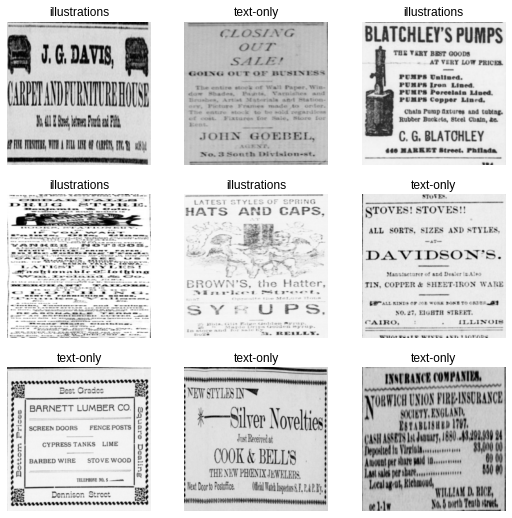

In [6]:
ad_data.show_batch()

### Creating the Model

Now that fastai knows how to load the data, the next step is to create a model which will be trained on this data. To create a model suitable for computer vision we will use a function cnn_learner. This function will create a ‘Convolutional Neural Network’, a type of deep learning model often used for computer vision applications. To use this function you need to pass (at a minimum):
- The data the model will use as training data.
- The type of model you want to use.

This is already sufficient for creating a computer vision model in fastai, but you will usually also want to pass some metrics you want to track during training. This will allow you to get a better sense of how well your model is performing on the task you are training it on. In this example, we’ll use accuracy as the metric.

Let’s create this model and assign it to a new variable `learn`



In [7]:
learn = cnn_learner(
    ad_data,  # the data the model will be trained on
    resnet18,  # the type of model we want to use
    metrics=accuracy,  # the metrics to track
)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

### Training the Model

Although we have created a `cnn_learner` model, we haven’t actually trained the model yet. This is done using a `fit` method. Training is the process which allows the computer vision model to ‘learn’ how to predict the correct labels for the data. There are different ways we can now train (fit) this model. To start with, we’ll use the fine_tune method. In this example the only thing we’ll pass to the fine tune method is the number of epochs to train for. Each pass through the entire dataset is an ‘epoch’. The amount of time the model takes to train will depend on where you are running this code and the resources available. 

In [8]:
learn.fine_tune(5)

epoch,train_loss,valid_loss,accuracy,time
0,1.055351,0.335308,0.820000,00:12


epoch,train_loss,valid_loss,accuracy,time
0,0.426656,0.341460,0.880000,00:07
1,0.256849,0.342311,0.866667,00:07
2,0.174033,0.371248,0.886667,00:07
3,0.130129,0.119322,0.953333,00:07
4,0.098096,0.074565,0.973333,00:07


### A Non-Scientific Experiment Assessing Transfer Learning 

The use of deep learning in the context of working with heritage data has not been extensively researched. It is therefore useful to do small ‘experiments’ to try to validate whether a particular technique helps. This is also very useful for learning more about how deep learning works. As an example of this, let’s see if transfer learning was actually helpful for training to classify whether 19th-century newspaper adverts contained images or not. To do this we’ll create a new learner with the same parameters as before but with the pretrained flag set to False; this flag tells fastai not to use transfer learning. We’ll store this in a variable learn_random_start.

In [9]:
learn_random_start = cnn_learner(ad_data, resnet18, metrics=accuracy, pretrained=False)

Now we have created a new learner, we’ll use the same fine_fune method as before and train for the same number of epochs as we used last time around.

In [10]:
learn_random_start.fine_tune(5)

epoch,train_loss,valid_loss,accuracy,time
0,1.272738,0.693525,0.613333,00:07


epoch,train_loss,valid_loss,accuracy,time
0,0.757371,0.806215,0.546667,00:07
1,0.524426,0.875806,0.580000,00:07
2,0.383657,0.438310,0.800000,00:07
3,0.298248,0.211509,0.933333,00:07
4,0.235758,0.238358,0.920000,00:06


This best score we get when we randomly initialise the weights for the model is ~90% accuracy. In comparison, if we go back to our original model, which is stored in a variable learn, and use the validate() method, we get the metrics (in this case accuracy) calculated on the validation set:

In [11]:
learn.validate()

(#2) [0.07456490397453308,0.9733333587646484]

## Lesson part two



# A Full Deep Learning Pipeline

This is the second part of a series of lessons. We assume you have already done part one of the lesson which also includes setup instructions. 

In the previous lesson, we introduced the process of creating an image classifier model and looked at some of the key steps in a deep learning pipeline. 

In this lesson, we will move in more detail through the steps involved in creating a deep learning model, from exploring the data, to training the model. This will reinforce some of the concepts that were discussed in the previous lesson. 

As a reminder, we can think of the process of creating a deep learning model as a pipeline of related steps. In this lesson we will move through this pipeline step by step:

![](https://raw.githubusercontent.com/davanstrien/Programming-Historian-Computer-Vision-Lessons-submission/main/deep-learning/figs_deeplearning/deep-learning-pipeline-simple.png)

## Looking at the Data

First we import the pandas library. By convention pandas is usually imported `as` pd.

In [12]:
import pandas as pd

We will also import [Matplotlib](https://matplotlib.org/). We will tell Matplotlib to use a different [style](https://matplotlib.org/3.2.1/gallery/style_sheets/style_sheets_reference.html) using the `style.use` method.

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [14]:
df = pd.read_csv('../input/computer-vision-for-the-humanities-ph/photos_multi/photos_multi/multi_label.csv', na_filter=False)

In [15]:
df

,download_image_path,label
0,in_hoosier_ver01_data_sn82015679_00202191757_1904012401_0467_008_0_96.jpg,human
1,dlc_rottweiler_ver01_data_sn83045462_00280655533_1903102601_0046_004_0_95.jpg,human
2,curiv_joshuaTree_ver01_data_sn85066387_00175037858_1899062601_0564_009_0_90.jpg,human|landscape
3,curiv_fiddleneck_ver01_data_sn85066408_00271767213_1916051601_0139_006_0_97.jpg,human
4,me_aroostook_ver01_data_sn84022374_00332895473_1900112801_0384_000_0_96.jpg,human
...,...,...
1995,khi_corbett_ver01_data_sn82016014_00295870278_1914100801_0408_002_0_98.jpg,animal
1996,kyu_casablanca_ver01_data_sn86069457_00206533262_1895061301_0798_004_0_92.jpg,human
1997,idhi_angkor_ver01_data_sn86091084_00279550845_1906033101_0372_000_0_92.jpg,human
1998,txdn_infiniti_ver03_data_sn88083938_00200294269_1897010501_1290_000_0_99.jpg,human-structure


It is useful to explore the properties of a dataset before using it to train a model. If you created the training labels for the dataset you will likely already have a sense of the structure of the data but it is still useful to empirically validate this. We can start by looking at the label values. In pandas we can do this with the value_counts() method on a Pandas Series (i.e. a column) to get the counts for each value in that column.

In [16]:
df['label'].value_counts()

human                                     1371
human-structure                            142
human|human-structure                      104
landscape                                   83
                                            80
human-structure|landscape                   69
human|landscape                             48
human|human-structure|landscape             28
human|animal                                24
animal                                      20
human|animal|landscape                      11
human|animal|human-structure                 9
animal|human-structure                       4
human|animal|human-structure|landscape       3
animal|landscape                             3
animal|human-structure|landscape             1
Name: label, dtype: int64

This is a start, but we can see that because the labels for each image are stored in the same column with a | separator, we don’t get the proper number of label counts. Instead, we see the combinations of labels. Human is often a single label, and human/human-structure are often together. Since our images can have zero, one, or multiple labels, what we really want is to see how often each individual label appears.

First, lets export the label column from the Pandas DataFrame to a Python list. We can do this by indexing into the Pandas column for labels, and then using the to_list() pandas method to convert the Pandas column to a list.

Once we’ve done this, we can take a slice from this list to display a few examples.

In [17]:
# create a variable lables to store the list
labels = df['label'].to_list() 
# take a slice of this list to display
labels[:6]

['human', 'human', 'human|landscape', 'human', 'human', 'human']

In [18]:
# for each label in the list split on "|"
split_labels = [label.split("|") for label in labels]

Let’s see what this looks like now by taking a slice of the list.

In [19]:
split_labels[:4]

[['human'], ['human'], ['human', 'landscape'], ['human']]

We now have all of the labels split out into individual parts. However, because the Python split method returns a list, we have a list of lists. We could tackle this in a number of ways. Below, we use another list comprehension to flatten the list of lists into a new list.

In [20]:
labels = [label for sublist in split_labels for label in sublist]
labels[:4]

['human', 'human', 'human', 'landscape']

We now have a single list of individual labels.

### Counting the labels

To get the frequencies of these labels we can use the Counter class from the Python Collections module:



In [21]:
from collections import Counter
label_freqs = Counter(labels)

`Counter` returns a Python `dictionary` with the labels as `keys` and the frequency counts as `values`. We can look at the values for each label:

In [22]:
label_freqs

Counter({'': 80,
         'animal': 75,
         'human': 1598,
         'human-structure': 360,
         'landscape': 246})

You’ll notice one of the Counter keys is an empty string ''. This represents images where no label has been assigned i.e. none of our desired labels appear in the image.

We can also see how many total labels we have in this dataset, by accessing the values attribute of our dictionary, using values() and using sum to count the total:

In [23]:
sum(label_freqs.values())

2359

Although we have a sense of the labels already, visualizing the labels may help us understand their distribution more easily. We can quickly plot these values using the `matplotlib` python library to create a bar chart.

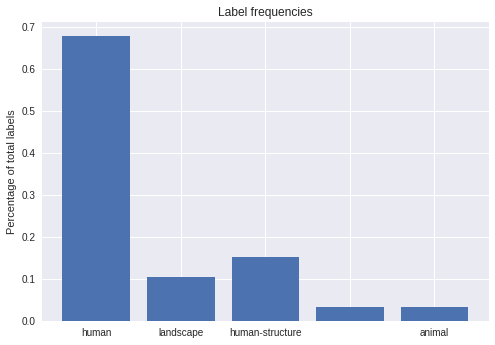

In [24]:
import matplotlib.pyplot as plt

plt.bar(
    label_freqs.keys(),  #pass in our labels 
    list(map(lambda x: x / sum(label_freqs.values()), label_freqs.values())),  # normalized values
)
# add a title to the plot
plt.title("Label frequencies")
# add a y axis label
plt.ylabel("Percentage of total labels")
plt.show()  # show the plot

## Loading Data


For our last dataset we loaded our data from a csv file using the .from_csv() method. Since we now have our data loaded into a pandas DataFrame we’ll instead use this DataFrame to load our data. We can remind ourselves of the column names by accessing the columns attribute of a DataFrame:

In [25]:
df.columns

Index(['download_image_path', 'label'], dtype='object')

The code for loading from a DataFrame is fairly similar to the method we used before. There are a few additional things we need to specify to load this data. The code is commented to show what each line does but some key things to point out are:

- `bs` (batch size). As we saw earlier, most deep learning models take data one batch at a time. bs is used to define how many data points (in our case images) should go into a batch. Often 32 is a good starting point, but if you are using large images, or have a GPU with less memory you may need to reduce the number to 16 or 8. If you have a GPU with a lot of memory you may be able to increase bs to a higher number.
- `label_delim` (label delimiter). Since we have multiple labels in the label column, we need to tell fastai how to split those labels, in this case on the | symbol.
- `valid_pct` (validation percentage). This is the amount (as a percentage of the total data) that we want to use as validation data. In this case we use 30%, but the amount of data you hold out as validation data will depend on the size of your data, the distribution of your labels and other considerations. An amount between 20-30% is often used. You can find a more extensive discussion from fastai on how (and why) to create a good validation set.


In [26]:
photo_data = ImageDataLoaders.from_df(
    df,  # the dataframe where our labels and image file paths are stored
    folder="../input/computer-vision-for-the-humanities-ph/photos_multi/photos_multi/photo_images",  # the path to the directory holding the images
    bs=32,  # the batch size (number of images + labels)
    label_delim="|",  # the deliminator between each label in our label column
    item_tfms=Resize(224),  # resize each image to 224x224
    valid_pct=0.3,  # use 30% of the data as validation data
    seed=42  # set a seed to make results more reproducible
)

### fastai DataLoaders


We have created a new variable using a method from ImageDataLoaders - lets see what this is.

In [27]:
photo_data

The `ImageDataLoaders.from_df` method produces something called ``DataLoaders`. `DataLoaders` are the way in which fastai prepares our input data and labels to a form that can be used as input for a computer vision model. It’s beyond the scope of this lesson to fully explore everything this method does ‘under the hood’, but we will have a look at a few of the most important things it does in this section.

#### Viewing our Data
We have already seen an example of `show_batch`, this method will allow you to preview some of your data and labels. We can pass a `figsize` to control how large our displayed images are.

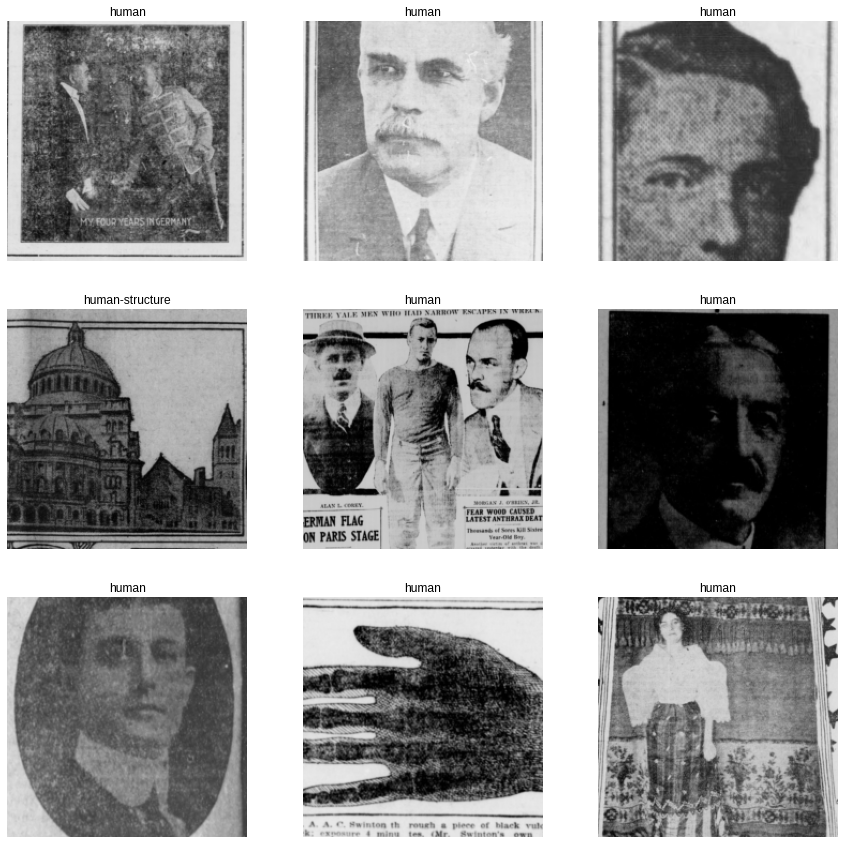

In [28]:
photo_data.show_batch(figsize=(15,15))

You will see above that the labels are separated bya ;. This means fastai has understood that the | symbol indicates different labels for each image.

### Inspecting Model Inputs

Our model takes labels and data as inputs. To help us understand some more of the details of the deep learning pipeline we can inspect these both in more detail. We can access the `vocab` attribute of our data to see which labels our data contains.

In [29]:
photo_data.vocab

['animal', 'human', 'human-structure', 'landscape']


### Viewing our Data

In part 1 of this lesson, we saw an example of show_batch, this method will allow you to preview some of your data and labels. We can pass a figsize to control how large our displayed images are.

We can see here that we have the four labels we expect. We will also have some images which are unlabelled. Since the model has the ability to apply each label individually, the model can also ‘choose’ to not apply any labels for a particular image, for example, if we have an image containing a picture of a vase of flowers, we would expect the model to not apply any labels in this situation.

As mentioned previously, deep learning models use the underlying numerical representation of images, rather than ‘seeing’ images in the same way as a human. We also saw in the outline of the training process that model training usually happens in batches. When photo_data was created above bs=32 was specified. We can access a single batch in fastai using one_batch(). We’ll use this to inspect what the model gets as input.

Since our data is made up of two parts (the input images, and the labels), `one_batch()` will return two things. We will store these in two variables: `x` and `y`.

We can start by checking what ‘type’ x and y are. We can do this using the Python type function.

In [30]:
x, y = photo_data.one_batch()

In [31]:
type(x), type(y)

(fastai.torch_core.TensorImage, fastai.torch_core.TensorMultiCategory)

These types will likely not be ones you have seen before since these are specific to fastai, but we can see that x is a TensorImage and y is TensorMultiCategory. A “Tensor” is a ‘n-dimensional array’; in this case one for storing images, and one for storing multiple labels. We can explore these in more detail to inspect what both of these Tensors look like. To start, we can take a look at the length of both x and y:

In [32]:
len(x), len(y)

(32, 32)

Remember that when we loaded our data, we defined a batch size of 32, so this length represents all of the items in one batch. Let’s take a look at a single example from that batch. We can use the standard Python indexing to the access the first element of `x`

In [33]:
x[0]

TensorImage([[[0.9451, 0.9451, 0.9451,  ..., 0.2941, 0.2627, 0.3255],
         [0.9255, 0.9294, 0.9333,  ..., 0.0235, 0.0157, 0.0196],
         [0.9098, 0.9294, 0.9412,  ..., 0.0039, 0.0039, 0.0039],
         ...,
         [0.9922, 0.9922, 0.9922,  ..., 0.9255, 0.9216, 0.9216],
         [0.9922, 0.9922, 0.9922,  ..., 0.2510, 0.2510, 0.2667],
         [0.9922, 0.9961, 0.9961,  ..., 0.6980, 0.7176, 0.7412]],

        [[0.9451, 0.9451, 0.9451,  ..., 0.2941, 0.2627, 0.3255],
         [0.9255, 0.9294, 0.9333,  ..., 0.0235, 0.0157, 0.0196],
         [0.9098, 0.9294, 0.9412,  ..., 0.0039, 0.0039, 0.0039],
         ...,
         [0.9922, 0.9922, 0.9922,  ..., 0.9255, 0.9216, 0.9216],
         [0.9922, 0.9922, 0.9922,  ..., 0.2510, 0.2510, 0.2667],
         [0.9922, 0.9961, 0.9961,  ..., 0.6980, 0.7176, 0.7412]],

        [[0.9451, 0.9451, 0.9451,  ..., 0.2941, 0.2627, 0.3255],
         [0.9255, 0.9294, 0.9333,  ..., 0.0235, 0.0157, 0.0196],
         [0.9098, 0.9294, 0.9412,  ..., 0.0039, 0.003

Although it isn’t super clear from looking at this output, this is the first image in our batch in the format in which it will be passed to the model. Since this output isn’t very meaningful for us to interpret, let’s access the shape attribute:

In [34]:
x[0].shape

torch.Size([3, 224, 224])

This output is hopefully more meaningful. The first dimension 3 refers to the number of channels in our image (since the image is an RGB image). The other dimensions `224` are the size we specified when we loaded our data `item_tfms=Resize(224)`.

Now we have inspected `x`, the input images, we’ll take a look at the `y`, which holds the labels. Again, we can index into the first `y`:

In [35]:
y[0]

TensorMultiCategory([0., 1., 1., 0.], device='cuda:0')

We can see that the first y is also a tensor. However, this label tensor looks different from our image example. In this case, we can easily manually count the number of elements. However, to be sure let’s access the shape attribute:

In [36]:
y[0].shape

torch.Size([4])

So we have four elements in our first `y`. These are ‘one hot encoded’ versions of our labels. ‘One hot encoding’ is a way of expressing labels where `0` is no label and `1` is a label. So in this case we have no labels in the vocab present in the label tensor for the first image.

Now we can finally take a look at the first batch as a whole:

In [37]:
x.shape, y.shape

(torch.Size([32, 3, 224, 224]), torch.Size([32, 4]))

Again, this can be useful to verify that data looks as you would expect. It is also a useful way of ‘poking’ around to see how data is prepared for the model. Now we have had a look at what our data looks like, we’ll examine some potential ways to maximize our fairly modest dataset.

## Image Augmentations

In [38]:
tfms = setup_aug_tfms([Rotate(max_deg=90, p=0.75), Zoom(), Flip()])

In [39]:
photo_data = ImageDataLoaders.from_df(
    df,  # dataframe containing paths to images and labels
    folder="../input/computer-vision-for-the-humanities-ph/photos_multi/photos_multi/photo_images",  # folder where images are stored
    bs=32,  # batch size
    label_delim="|",  # the deliminator for multiple labels
    item_tfms=Resize(224),  # resize images to a standard size
    batch_tfms=tfms,  # pass in our transforms
    valid_pct=0.3,  # 30% of data used for validation
    seed=42,  # set a seed,
)

In this example, we keep everything the same as before, except we now add a function `setup_aug_tfms` to create some image transformations. We pass this into the `batch_tfms` parameter in the `ImageDataLoader`. In the previous lesson, we saw `item_tfms` in our advert data loading example. What is the difference between these two transforms?

`item_tfms`, as the name suggests, are applied to each item before they are assembled into a batch, whereas batch_tfms are instead applied to batches of images - in our case 32 images at a time. The reason we should use batch_tfms when possible, is that they happen on the GPU and as a result are much faster. However, if you don’t have a GPU available, they will still work.

Now we have passed some augmentations to our data, we should take a look at what the data looks like. Since we are now concerned with the transformations in particular, it will be easier to compare if we look at the same image. We can do this by passing the unique=True flag to show_batch()



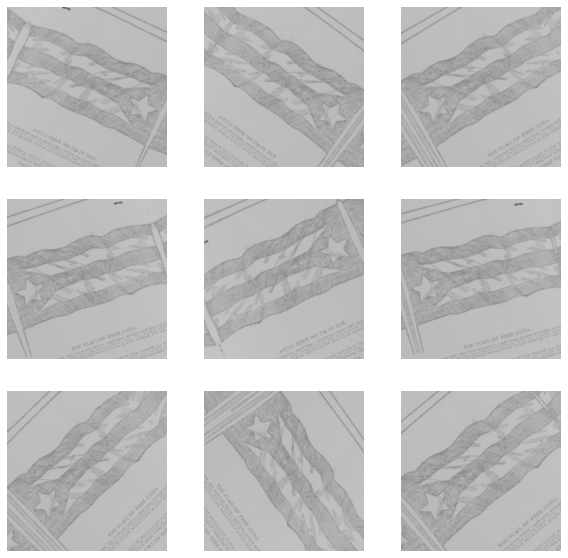

In [40]:
photo_data.show_batch(unique=True, figsize=(10,10))

We can see that the same image has been manipulated in a variety of ways, including zooms and rotations.

## Creating a Model
Now we have loaded data, including applying some augmentations to the images, we are ready to create our model, i.e. moving to our training loop.

We again use `cnn_learner` to create a model. We now know that the “cnn” refers to a type of deep learning model. We again pass our data in, and specify an existing model architecture we want to use.

This time we use a “DenseNet” model architecture instead of the “ResNet” model which was used in our previous example. This is done to show how easily we can experiment with different model architectures supported by fastai. Although “ResNets” are good starting point you should feel free to also experiment with other model architectures which may perform better with less data or be optimized to run with fewer compute resource.

We again pass in some metrics. We use `F1ScoreMulti` since we want to use F1 as a metric on a dataset with multiple labels. We also pass in `accuracy_multi`; this is a multi-label version of accuracy. We include this to illustrate how different metrics can give very different scores for the performance of our model.

In [41]:
learn = cnn_learner(photo_data, densenet121, metrics=[F1ScoreMulti(), accuracy_multi])

Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth


  0%|          | 0.00/30.8M [00:00<?, ?B/s]

Now that we have created our model, and stored it in the variable learn, let’s look at what this is. This time we’ll use a nice feature of Jupyter notebooks, which allows you to easily access documentation about a library.

In [42]:
?learn

In a notebook, placing `?` in front of a library, method or variable will return the Docstring. This can be a useful way of accessing documentation. In this example, you will see that a learner groups our model, our data `dls` and a “loss function”. Helpfully, fastai will often infer a suitable `loss_func` based on the data it is passed.

## Training the Model
The fastai `learner` contains some powerful functionalities to help train your model. One of these is the learning rate finder. A learning rate determines how aggressively we update our model after each batch. If the learning rate is too low, the model will only improve very slowly. If the learning rate is too high, the loss of the model will go up, i.e. the model will get worse rather than better. fastai includes a method lr_find which helps with this process. Running this method will start a progress bar before showing a plot.

SuggestedLRs(valley=0.0012022644514217973)

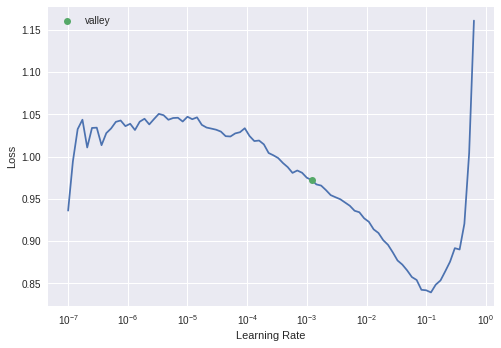

In [43]:
learn.lr_find()

`lr_find` helps find a suitable learning rate by training on a “mini batch”, and slowly increasing the learning rate until the loss starts to get much worse. 

We want to pick a point where the loss is going down steeply, since this should be a learning rate which will allow our model to update quickly whilst avoiding the point where the loss shoots up. In this case we’ll pick `2e-2`. For a fuller explanation of how the loss is used to update a model we recommend a [youtube](https://www.youtube.com/watch?t=184&v=IHZwWFHWa-w&feature=youtu.be) video by Grant Sanderson.

Picking a good learning rate is one of the important variables that you should try and control in the training pipeline. A useful exercise is to try out a range of different learning rates with the same model and data to see how it impacts the training of the model.

### Fitting the Model 

We are ready to train our model. We previously used the `fine_tune` method, but we can also use other methods to train our model. In this example we will use a method called [`fit_one_cycle`](https://docs.fast.ai/callback.schedule#Learner.fit_one_cycle). This method implements an approach to training described in a [research paper](https://arxiv.org/pdf/1708.07120.pdf) that was found to improve how quickly a model trains. The fastai library implements many best practices in a way that makes them easy to use. For now we'll train the model for 5 epochs using a learning rate 2e-2


In [44]:
learn.fit_one_cycle(5, lr_max=2e-2)

epoch,train_loss,valid_loss,f1_score,accuracy_multi,time
0,0.684149,0.340914,0.410480,0.885417,01:47
1,0.513168,0.370506,0.302020,0.875417,01:45
2,0.435293,0.260362,0.516695,0.909167,01:45
3,0.346799,0.238698,0.521439,0.917917,01:55
4,0.292290,0.238450,0.528811,0.916250,01:46


Most of this output is similar to the output we got when training our previous model in the previous lesson. One difference is that this time we only get one set of outputs, rather than the two we had in the ads example in the previous lesson. This is because we are no longer unfreezing the model during the training step, and are only training the last layers of the model. The other layers of the model are using the weights learned from training on [ImageNet](https://en.wikipedia.org/wiki/ImageNet), so we don't see a progress bar for training these layers.

Another difference is that now we have two different metrics; `f1_score` and `accuracy_multi`. The potential limitations of accuracy are made clearer in this example. If we took used accuracy as our measure here, we could mistakenly think our model is doing much better than is reflected by the F1-Score. 

We also get an output for `train_loss` and `valid_loss`. As we have seen, a deep learning model has some way of calculating how wrong it is, using [loss function](https://en.wikipedia.org/wiki/Loss_function). The 'train' and 'valid' refer to the loss for the training and validation data. It can be useful to see the loss for both of these to see how whether our model performs very differently on the training data in compared to the validation data. Although the loss values can be tricky to directly interpret, we can use the change of these values to see whether our model is improving (we would expect loss to go down when the model is improving). We can also access the `recorder` attribute of our `learner` to `plot_loss`; this will give us a visual sense of how the training and validation loss change as the model is trained. 




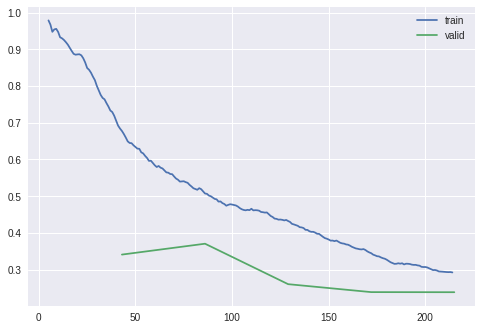

In [45]:
learn.recorder.plot_loss()

Compared to our previous model, we are not getting a very good score. Let’s see if “unfreezing” the model (updating the lower layers of the model) helps improve the performance.

#### Saving Progress

Since training a deep learning model takes time and resources, it is useful to save progress as we train our model. This is particularly useful since it is possible to overfit a model, or do something else which makes it perform more poorly than previous epochs. To save the model, we can use the `save` method and pass in a `string` value to name this save point, allowing us to return to this point if we mess something up later on. 


In [46]:
learn.save('stage_1')

Path('models/stage_1.pth')

### Unfreezing the Model

Now that our progress so far has been saved, we can see if training the lower layers of the model improves our model. We can unfreeze a model by using the `unfreeze` method on our `learner`. 



In [47]:
learn.unfreeze()

Calling this method means that the lower layers of the model will now be updated during training. It is often useful to run `lr_find` again when a model has been unfrozen, since the appropriate learning rate will usually be different. 



SuggestedLRs(valley=0.0002754228771664202)

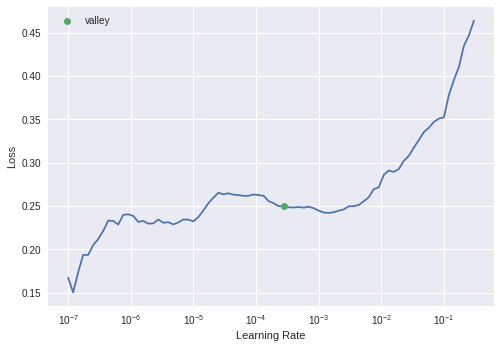

In [48]:
learn.lr_find()

The learning rate plot looks different this time, with a flattish loss before the loss shoots up. Interpreting `lr_find` plots is not always straight-forward, especially for a model that has been unfrozen, but usually the best learning rate for a unfrozen model will be smaller than one used for the frozen model at the start of training. 

Another useful trick is that we don't just have to pick one learning rate. The `fastai` library provides support for 'differential learning rates', which apply different learning rates to different layers of our model (if you need a reminder of these layers you may want to refer to the [previous lesson](/en/lessons/computer-vision-deep-learning-pt1#creating-a-model)).When looking at transfer learning in the previous lesson, we saw that the lower layers of a network often learn 'fundamental' visual features, whilst later layers are more task specific. As a result, we may not want to update our model with a single learning rate, since we want the lower layers of the model to be updated more slowly than the end layers. A simple way of using different learning rates is to use the Python `slice` function. In this case we'll try and pick a learning rate range where the model hasn't shot up yet. 

We saw above how we can save a model that we have already trained - another way to do this is to use a 'callback'. [Callbacks](https://en.wikipedia.org/wiki/Callback_computer_programming) are sometimes used in programming to modify or change the behavior of some code. fastai includes a callback `SaveModelCallback` which as the name suggests, will save the model. By default it will save the best performing model during your training loop and load it at the end. We can also pass in the thing we want fastai to monitor to see things are improving. In this example we'll pass in `f1_score`, since this is the metric we are trying to improve. 

Let's now train the model for a few more epochs:

In [49]:
learn.fit_one_cycle(4, lr_max=slice(6e-6, 4e-4), cbs=[SaveModelCallback(monitor='f1_score')])

epoch,train_loss,valid_loss,f1_score,accuracy_multi,time
0,0.245194,0.232016,0.569789,0.923333,01:46
1,0.237894,0.225907,0.572070,0.923333,01:46
2,0.236667,0.222440,0.562005,0.922083,01:45
3,0.234272,0.223987,0.572850,0.924167,01:45


Better model found at epoch 0 with f1_score value: 0.5697890819721865.
Better model found at epoch 1 with f1_score value: 0.57207024635139.
Better model found at epoch 3 with f1_score value: 0.5728504494167145.


## Investigating the Results of our Model 

Looking back to our diagram above, we almost always set up our model to provide some metrics which tell us how well the model is doing at a given task. In this section, we'll provide some hints on how to inspect this information in more detail.  

Our model is not performing super well yet. But we shouldn't give up at this point. Just as we explored the data before we created our model, we will often need to explore the results of the model too. In this last section of our training loop we'll explore some of the characteristics of our model results. 

So far, we have used the metrics printed out during the training loop. We may, however, want to directly work with the predictions from the model, to give us more control over which metrics are used, and allow us to see the level of certainty behind each prediction. We can call `get_preds`. This is a method that runs our model in 'inference' mode i.e. to make new predictions. We can also use this method to run predictions on new data.

By default, `get_preds` will return the results of our model on our validation data. We also get back the correct labels. We'll store these values in `y_pred` and `y_true`. Again we use the commonplace `x` and `y` notations for data (x) and labels (y). In this case since we are working with two types of labels, we'll store them as predicted and true i.e. one is our predicted value, whilst the other is the correct label. 



In [50]:
y_pred, y_true = learn.get_preds()

We can explore some properties of both of these variables to get a better sense of what they are:

In [51]:
len(y_pred), len(y_true)

(600, 600)

Both `y_pred` and `y_true` have a length of 600. This is the validation part of our dataset, so this is what we'd expect since that is 30% of our total dataset size (there were 2002 rows in our `DataFrame`). Let's index into one example of `y_pred`:

In [52]:
y_pred[0]

TensorBase([4.0667e-03, 9.9924e-01, 1.1857e-03, 6.1050e-04])

What does this represent? We have four values, representing each of the potential labels in our dataset. Each of these is a probability for a particular label. For a classification problem where there are clear categories, having a single class prediction is a useful feature of a model. However, if we have a set of labels or data which contain more ambiguity, then having the possibility to 'tune' the threshold of probability at which we assign a label could be very helpful. For example, we might only use predictions for a label if a model is >80% certain of a possible label. There is also the possibility of trying to work directly with the predicted label probabilities, rather than converting them to labels. 


## Exploring our Predictions Using scikit-learn

Now that we have a set of predictions and actual labels, we could directly explore these using other tools. In this example we'll use [scikit-learn](https://scikit-learn.org/stable/), a Python library for machine learning. In particular we will use the metrics module to look at our results.



In [53]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

These imported metrics should look familiar from the earlier in the lesson, where metrics were discussed. These metrics are functions to which we can pass in our predictions and true labels. 

We also pass in an `average`, which determines how our labels are averaged, to give us more control over how the F1 score is calculated. In this case we use 'macro' as the average, which tells the function to ["calculate metrics for each label, and find their unweighted mean."](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)



In [54]:
f1_score(y_true, y_pred>0.50, average='macro')

0.5728504494167145

Although it could be useful to calculate different scores for our total dataset, it would be useful to have more granularity for how our model is performing. For this we can use `classification_report` from scikit-learn. 



In [55]:
from sklearn.metrics import classification_report

In [56]:
print(classification_report(y_true, y_pred>0.50, target_names=photo_data.vocab, zero_division=1))

                 precision    recall  f1-score   support

         animal       1.00      0.00      0.00        22
          human       0.93      0.95      0.94       494
human-structure       0.74      0.72      0.73        89
      landscape       0.67      0.58      0.62        72

      micro avg       0.88      0.85      0.86       677
      macro avg       0.84      0.56      0.57       677
   weighted avg       0.88      0.85      0.85       677
    samples avg       0.91      0.90      0.87       677



We can now see a much more detailed picture of how our model is doing; we have 'precision', 'recall' and 'f1-score' broken down per label. We also have something called 'support' which refers to the number of examples of this label in the dataset. 

We can see from these results that some of our labels are performing better than others. The model does particularly well on the 'human' labels, and particularly badly on the 'animal' labels. If we look at the support for each of these we can see there are many more examples to learn from for the 'human' label (481), compared to the 'animal' label (31). This may explain some of the difference in performance of the model, but it is also important to consider the labels themselves, particularly in the context of working with humanities data and associated questions.

